**Hieararchical clustering**
* Let's start by loading the dataset and taking a look at its structure.
The dataset contains various columns, including order details, customer information, and product attributes. To apply hierarchical clustering, we need to select relevant features and preprocess the data appropriately.

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/Auto Sales data.csv'
auto_sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
auto_sales_data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


Let's start by loading the dataset and taking a look at its structure.
The dataset contains various columns, including order details, customer information, and product attributes. To apply hierarchical clustering, we need to select relevant features and preprocess the data appropriately.

In [3]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']
clustering_data = auto_sales_data[features]

# Checking for missing values
missing_values = clustering_data.isnull().sum()

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

missing_values, clustering_data_scaled[:5]  # Display missing values and first 5 rows of scaled data


(QUANTITYORDERED         0
 PRICEEACH               0
 SALES                   0
 MSRP                    0
 DAYS_SINCE_LASTORDER    0
 dtype: int64,
 array([[-0.52283136, -0.12843975, -0.37095642, -0.14191021, -1.134233  ],
        [-0.11301035, -0.46982278, -0.42811889, -0.14191021, -1.22091018],
        [ 0.60417643, -0.15127792,  0.18018545, -0.14191021, -1.28683366],
        [ 1.01399745, -0.42438434,  0.10532492, -0.14191021, -1.35275715],
        [ 0.09190016, -0.10560158, -0.03986012, -0.14191021, -1.42966788]]))

The selected features—'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', and 'DAYS_SINCE_LASTORDER'—do not have any missing values. They have been standardized, which is important for clustering analysis as it ensures each feature contributes equally to the distance calculations.

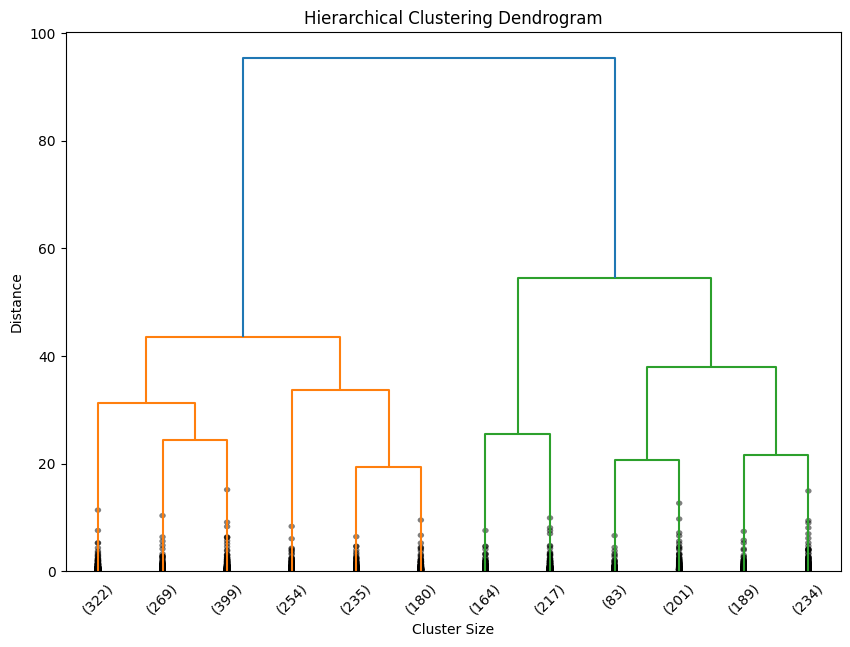

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying hierarchical clustering using Ward's method
Z = linkage(clustering_data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


**Linkage Computation for Different Methods:**
* linkage(clustering_data_scaled, method='single'): This computes the hierarchical clustering using the single linkage method. In single linkage, the distance between two clusters is defined as the shortest distance between any two points in the clusters.
* linkage(clustering_data_scaled, method='complete'): Here, the complete linkage method is used. In complete linkage, the distance between two clusters is defined as the longest distance between any two points in the clusters.
* linkage(clustering_data_scaled, method='average'): This line uses average linkage, where the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

In all these cases, clustering_data_scaled is the dataset you're working with, which has been scaled or normalized for effective clustering.

**Plotting Dendrograms:**
* plt.figure(figsize=(15, 5)): This creates a new matplotlib figure with a specified size.
Each subplot command (plt.subplot(1, 3, x)) divides the figure into a 1x3 grid (1 row, 3 columns), and x specifies the current subplot position.
* dendrogram(...): This function plots a dendrogram for each linkage method. The truncate_mode='lastp', p=12 parameters mean that the dendrogram will only show the last 12 merged clusters. This helps in keeping the dendrogram interpretable, especially for large datasets.
* plt.title(...), plt.xlabel(...), plt.ylabel(...): These commands set the title, x-axis label, and y-axis label for each dendrogram.
* plt.tight_layout(): Adjusts the padding between and around subplots for better layout.
* plt.show(): Finally, this displays the figure with the dendrograms.

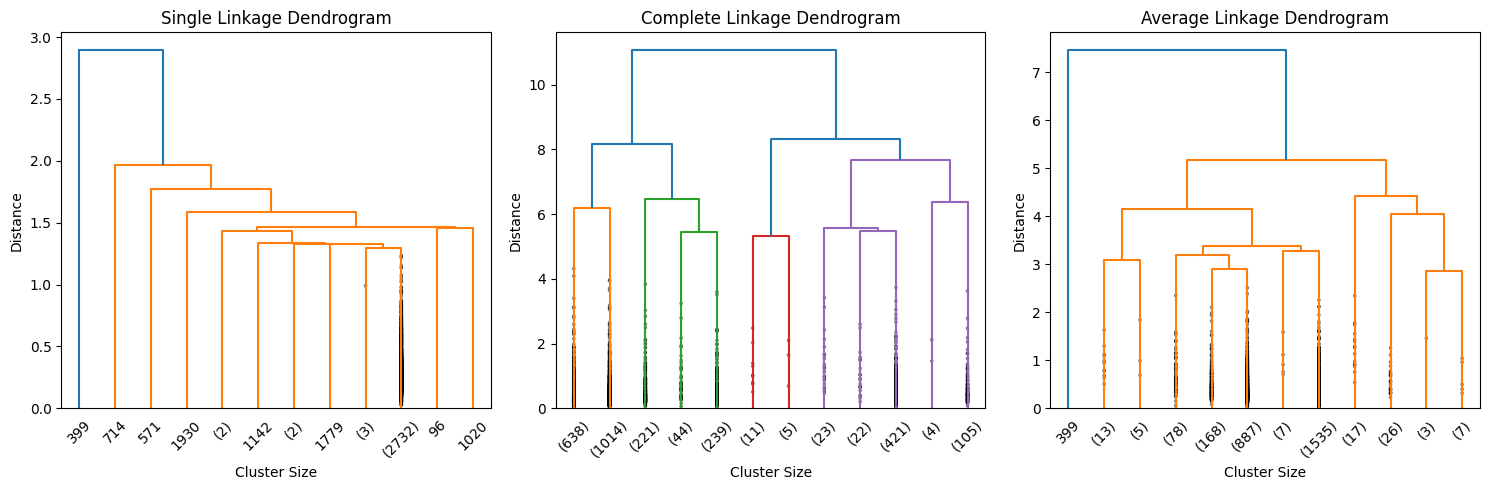

In [5]:
# Single Linkage
Z_single = linkage(clustering_data_scaled, method='single')

# Complete Linkage
Z_complete = linkage(clustering_data_scaled, method='complete')

# Average Linkage
Z_average = linkage(clustering_data_scaled, method='average')

# Plotting the dendrograms for each method
plt.figure(figsize=(15, 5))

# Single Linkage Dendrogram
plt.subplot(1, 3, 1)
dendrogram(Z_single, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Single Linkage Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Complete Linkage Dendrogram
plt.subplot(1, 3, 2)
dendrogram(Z_complete, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Average Linkage Dendrogram
plt.subplot(1, 3, 3)
dendrogram(Z_average, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Average Linkage Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


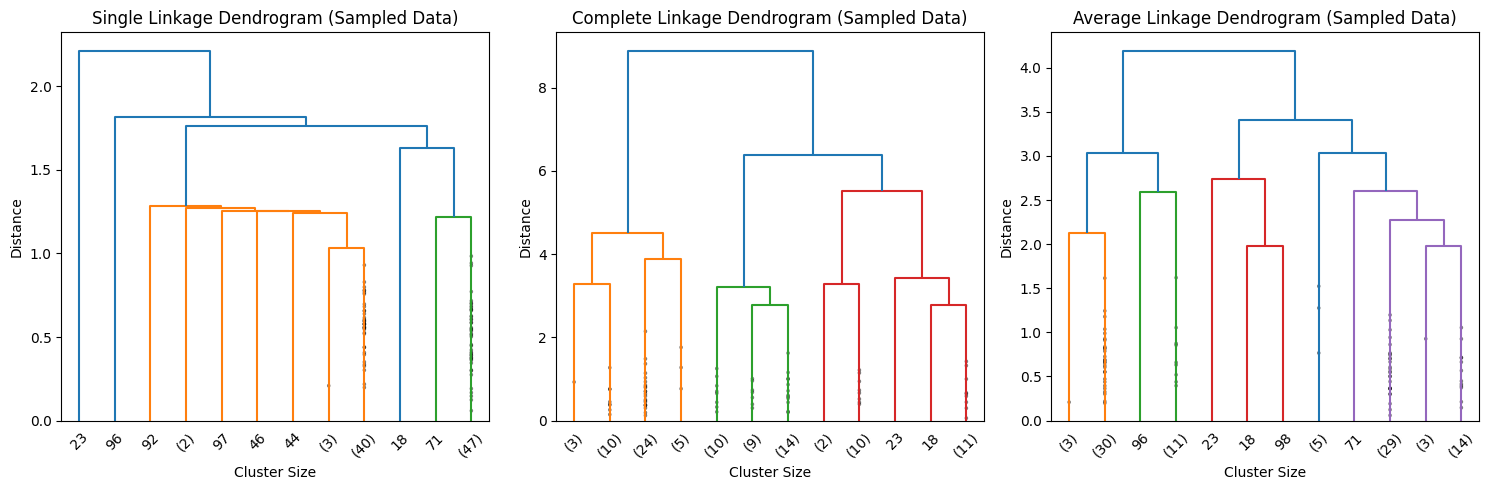

In [6]:
# Sampling a subset of the data for faster processing
sampled_data = clustering_data_scaled[:100]  # Using the first 100 rows

# Applying hierarchical clustering using different methods on the sampled data
Z_single_sampled = linkage(sampled_data, method='single')
Z_complete_sampled = linkage(sampled_data, method='complete')
Z_average_sampled = linkage(sampled_data, method='average')

# Plotting the dendrograms for each method with sampled data
plt.figure(figsize=(15, 5))

# Single Linkage Dendrogram
plt.subplot(1, 3, 1)
dendrogram(Z_single_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Single Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Complete Linkage Dendrogram
plt.subplot(1, 3, 2)
dendrogram(Z_complete_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Complete Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Average Linkage Dendrogram
plt.subplot(1, 3, 3)
dendrogram(Z_average_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Average Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


Each dendrogram visually represents the hierarchical clustering process. The y-axis shows the distance at which clusters are merged, and the x-axis represents the data points or clusters. These visualizations are useful for understanding the clustering structure and deciding on the number of clusters to use in further analysis.

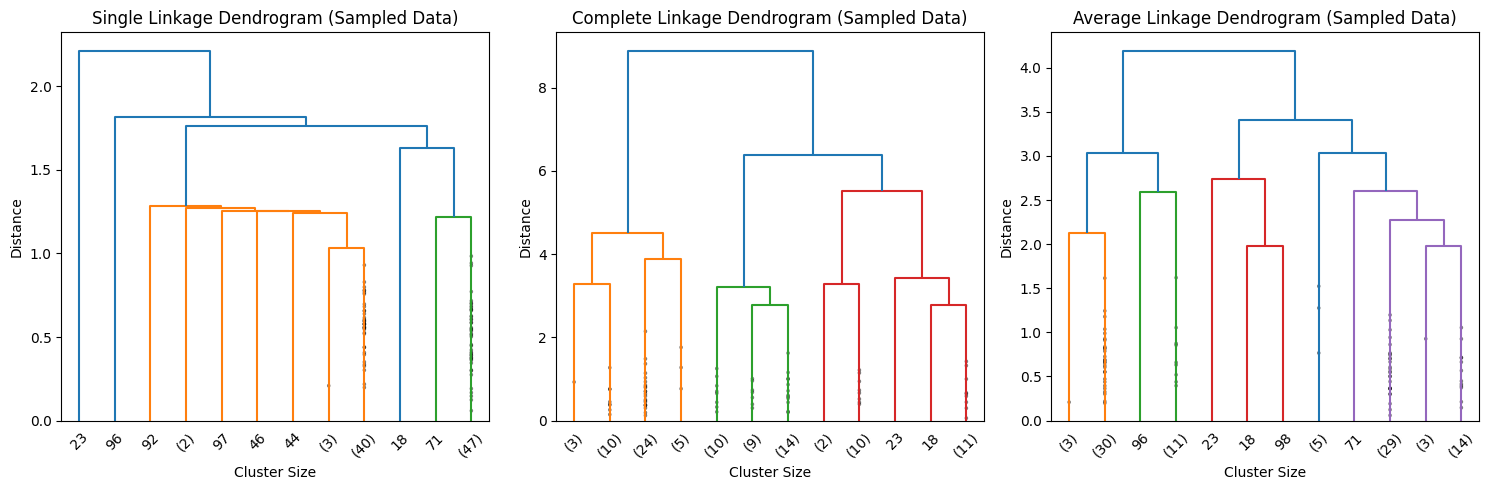

In [7]:
# Sampling a subset of the data for faster processing
sampled_data = clustering_data_scaled[:100]  # Using the first 100 rows

# Applying hierarchical clustering using different methods on the sampled data
Z_single_sampled = linkage(sampled_data, method='single')
Z_complete_sampled = linkage(sampled_data, method='complete')
Z_average_sampled = linkage(sampled_data, method='average')

# Plotting the dendrograms for each method with sampled data
plt.figure(figsize=(15, 5))

# Single Linkage Dendrogram
plt.subplot(1, 3, 1)
dendrogram(Z_single_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Single Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Complete Linkage Dendrogram
plt.subplot(1, 3, 2)
dendrogram(Z_complete_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Complete Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Average Linkage Dendrogram
plt.subplot(1, 3, 3)
dendrogram(Z_average_sampled, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Average Linkage Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()
